## 선형 회귀분석 ( Linear Regression)

→ 지도학습 중 예측 문제에 사용하는 알고리즘

→ 설명변수와 반응변수가 연속형 변수일 때 사용 가능, 범주형 변수일 경우 이를 더미변수로 변환해야 한다.

→ 주어진 데이터를 대표하는 하나의 직선을 찾는 것. 

- 회귀선을 찾는 기준 : 최소제곱법
    - 잔차 : 관측값의  y와 예측값의 y간의 차이
    - 최소제곱법은 잔차의 제곱의 합이 최소가 되도록 하는 직선을 회귀선으로 하는 것
    

→ 좋은 모델을 만들기 위한 기본 가정

1) 선형성

: 예측하고자 하는 종속변수와 독립변수 간에 선형성을 만족하는 특성

2) 독립성

: 독립변수간에 상관관계가 없어 독립성을 만족하는 특성 (다중 회귀분석시)

3) 등분산성

: 분산이 같다. 특정한 패턴 없이 고르게 분포

4) 정규성

: 잔차가 정규성을 만족하는지 여부

# 프로야구선수 연봉 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import rc
rc("font", family="Malgun")

In [2]:
# 한글 폰트 오류 문제 해결 (windows)
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 데이터 확인

In [3]:
pich = pd.read_csv("./picher_stats_2017.csv")

In [4]:
pich.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
pich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [6]:
pich.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


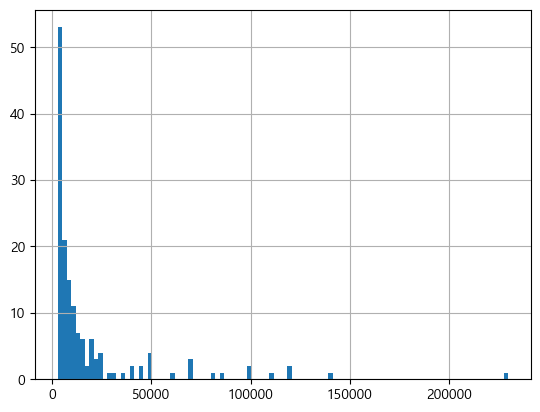

In [7]:
# 2018년 투수 연봉 분포 히스토그램으로 확인
pich["연봉(2018)"].hist(bins = 100)
plt.show()

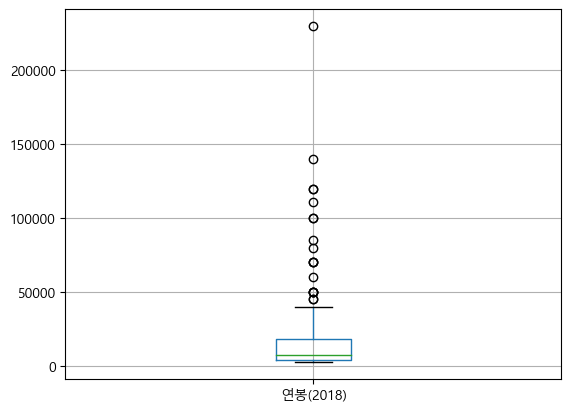

In [8]:
# 2018년 연봉의 boxplot 출력
pich.boxplot(column = ["연봉(2018)"])
plt.show()

- 종속변수 분석
    - 수십 억의 연봉을 받는 야구선수는 많지 않으며 5억원 미만의 연봉이 일반적이다.

In [9]:
# 선수명과 팀명을 제외한 데이터로 시각화하자.
vls_pich = pich.iloc[:, 2:]
vls_pich.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [10]:
len(vls_pich.columns)

20

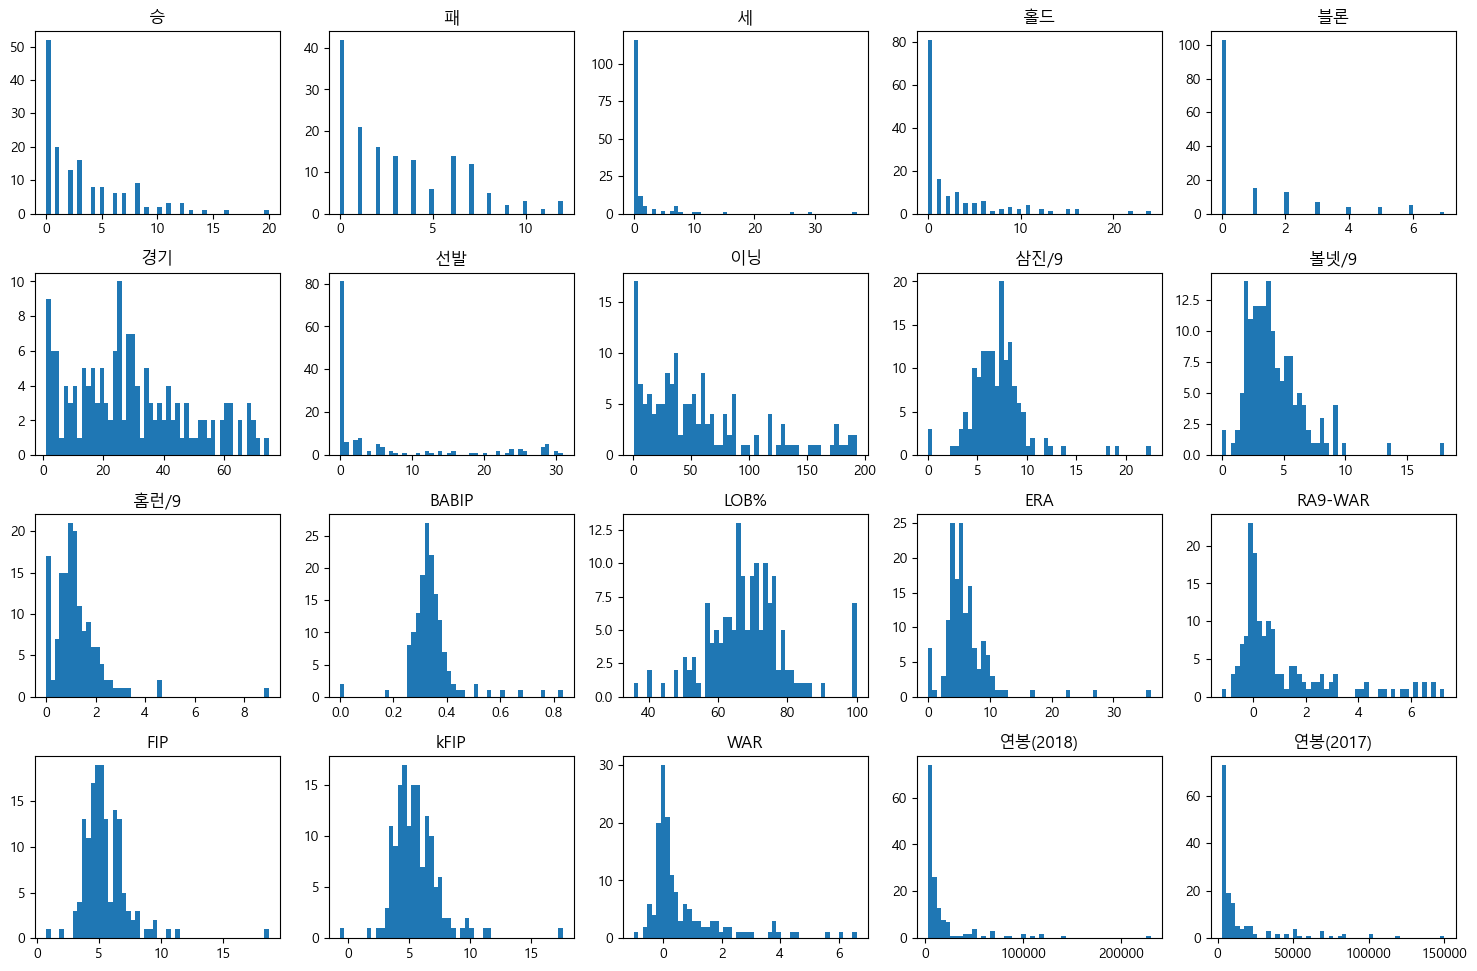

In [11]:
fig = plt.figure(figsize = (15, 12))

for i in range(len(vls_pich.columns)) :
    ax = fig.add_subplot(5,5, i+1)
    
    plt.hist(vls_pich[vls_pich.columns[i]], bins = 50)
    ax.set_title(vls_pich.columns[i])
    
plt.tight_layout()
plt.show()

- 매우 불균형한 분포를 가지고 있는 피처들이 많다.
- 각 피처간의 단위가 다르기 때문에 스케일링이 필요함

# 데이터 전처리

In [12]:
pich.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


- 팀명 피처에 대한 원핫인코딩 필요

## 원핫인코딩

In [13]:
#1

In [14]:
pich["팀명"].unique()

array(['SK', 'LG', 'KIA', '롯데', 'KT', '두산', '삼성', '한화', 'NC'],
      dtype=object)

In [15]:
team_ohe = pich[["팀명"]]

In [16]:
ohe = OneHotEncoder(sparse = False)
team_ohe = ohe.fit_transform(team_ohe)

C:\Users\tmdwn\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
team_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
ohe.get_feature_names_out()

array(['팀명_KIA', '팀명_KT', '팀명_LG', '팀명_NC', '팀명_SK', '팀명_두산', '팀명_롯데',
       '팀명_삼성', '팀명_한화'], dtype=object)

In [19]:
#2

In [20]:
team_ohe = pich["팀명"]

In [21]:
team_ohe = np.array(team_ohe)

In [22]:
team_ohe = np.reshape(team_ohe, (-1, 1))

In [23]:
team_ohe

array([['SK'],
       ['LG'],
       ['KIA'],
       ['LG'],
       ['롯데'],
       ['KT'],
       ['KT'],
       ['두산'],
       ['두산'],
       ['KIA'],
       ['삼성'],
       ['두산'],
       ['KIA'],
       ['롯데'],
       ['삼성'],
       ['롯데'],
       ['LG'],
       ['삼성'],
       ['LG'],
       ['롯데'],
       ['한화'],
       ['SK'],
       ['NC'],
       ['한화'],
       ['SK'],
       ['KT'],
       ['NC'],
       ['NC'],
       ['NC'],
       ['두산'],
       ['KT'],
       ['롯데'],
       ['롯데'],
       ['한화'],
       ['한화'],
       ['LG'],
       ['KIA'],
       ['삼성'],
       ['LG'],
       ['NC'],
       ['한화'],
       ['KIA'],
       ['LG'],
       ['한화'],
       ['LG'],
       ['SK'],
       ['두산'],
       ['SK'],
       ['두산'],
       ['삼성'],
       ['NC'],
       ['롯데'],
       ['두산'],
       ['SK'],
       ['KIA'],
       ['한화'],
       ['LG'],
       ['KT'],
       ['롯데'],
       ['삼성'],
       ['KIA'],
       ['한화'],
       ['KT'],
       ['KT'],
       ['삼성'],
       ['LG'],
   

In [24]:
ohe = OneHotEncoder()
team_ohe = ohe.fit_transform(team_ohe)

In [25]:
team_ohe = team_ohe.toarray()

In [26]:
team_ohe_df = pd.DataFrame(team_ohe, columns = ohe.get_feature_names_out())

In [27]:
# concat
pich = pd.concat([pich, team_ohe_df], axis = 1)

In [28]:
# 팀명 컬럼 삭제
pich.drop("팀명", axis = 1, inplace=True)

In [29]:
pich.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,켈리,16,7,0,0,0,30,30,190.0,8.95,...,85000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,소사,11,11,1,0,0,30,29,185.1,7.43,...,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,양현종,20,6,0,0,0,31,31,193.1,7.36,...,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,차우찬,10,7,0,0,0,28,28,175.2,8.04,...,100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,레일리,13,7,0,0,0,30,30,187.1,7.49,...,85000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
pich.shape

(152, 30)

# 데이터 분할

In [31]:
x = pich.drop(["선수명", "연봉(2018)"], axis = 1)
y = pich["연봉(2018)"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=221128)

In [33]:
x_train.shape, x_test.shape

((121, 28), (31, 28))

## 스케일링

In [34]:
# 원핫인코딩 한 컬럼 제외하고 스케일링 진행
x_train.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데', 'x0_삼성',
       'x0_한화'],
      dtype='object')

In [35]:
x_train.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데', 'x0_삼성',
       'x0_한화'],
      dtype='object')

In [36]:
ss_columns = x_train.columns[:-9]

In [37]:
x_train[ss_columns]

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
6,8,12,0,1,0,25,24,141.2,7.94,1.02,0.83,0.362,64.6,5.08,2.97,3.88,3.78,3.87,5200
99,0,0,0,0,0,7,0,8.2,7.27,3.12,1.04,0.346,66.2,6.23,0.07,5.35,5.46,-0.00,3300
132,0,1,0,0,0,20,1,36.0,4.00,5.25,0.25,0.381,67.0,6.75,-0.07,5.46,5.96,-0.20,5000
125,1,3,0,11,1,37,0,31.1,4.88,2.59,1.72,0.311,67.3,6.32,0.04,6.48,6.78,-0.16,45000
103,0,0,0,0,0,1,0,1.0,0.00,9.00,0.00,0.000,100.0,0.00,0.04,6.73,7.64,-0.01,2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,3,5,15,0,4,41,0,37.1,7.47,2.65,0.24,0.348,54.3,5.79,0.73,3.15,3.05,1.24,9000
97,0,0,0,0,0,1,0,1.0,9.00,9.00,0.00,0.667,40.0,27.00,-0.11,4.73,4.61,0.00,3200
134,1,4,0,0,0,9,7,32.0,7.59,3.94,2.53,0.359,52.5,9.84,-0.43,7.39,7.36,-0.20,7200
88,0,0,0,1,0,3,0,3.1,8.10,8.10,0.00,0.364,100.0,0.00,0.25,3.73,3.63,0.06,4000


In [38]:
pich_ss = StandardScaler()
scaled_train = pich_ss.fit_transform(x_train[ss_columns])
scaled_test = pich_ss.transform(x_test[ss_columns])                                     

In [39]:
scaled_train

array([[ 1.31127301,  2.81629016, -0.32139229, ..., -0.87445985,
         2.50156386, -0.44295503],
       [-0.84010372, -1.04513884, -0.32139229, ..., -0.04670573,
        -0.4916069 , -0.51895156],
       [-0.84010372, -0.72335309, -0.32139229, ...,  0.19964967,
        -0.64629273, -0.45095466],
       ...,
       [-0.57118163,  0.24200416, -0.32139229, ...,  0.88944477,
        -0.64629273, -0.36295867],
       [-0.84010372, -1.04513884, -0.32139229, ..., -0.94836647,
        -0.44520115, -0.49095284],
       [-0.84010372, -0.40156734, -0.32139229, ..., -0.06641416,
        -0.32145249, -0.46695393]])

In [40]:
scaled_train = pd.DataFrame(scaled_train, columns = ss_columns)
scaled_test = pd.DataFrame(scaled_test, columns = ss_columns)

In [41]:
scaled_train = pd.concat([scaled_train, x_train.iloc[:, 19:].reset_index(drop=True)], axis=1)
scaled_test = pd.concat([scaled_test, x_test.iloc[:, 19:].reset_index(drop=True)], axis=1)

In [42]:
scaled_train.shape, scaled_test.shape

((121, 28), (31, 28))

In [43]:
scaled_train.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,1.311273,2.816290,-0.321392,-0.364433,-0.563040,-0.195968,1.863736,1.681682,0.270811,-1.345443,...,-0.442955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.113855,-0.626963,-0.977371,0.040703,-0.438487,...,-0.518952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.840104,-0.723353,-0.321392,-0.589415,-0.563040,-0.450936,-0.523184,-0.421569,-1.082364,0.481426,...,-0.450955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.571182,-0.079782,-0.321392,1.885384,0.024269,0.415957,-0.626963,-0.519534,-0.780132,-0.667386,...,1.148972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.419817,-0.626963,-1.121319,-2.456146,2.100990,...,-0.542950,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 모델 훈련

In [44]:
lr = LinearRegression()
lr.fit(scaled_train, y_train)

LinearRegression()

In [45]:
len(lr.coef_)

28

In [46]:
# 기울기
lr.coef_

array([ 4.87250619e+03,  1.67938829e+01, -2.59516253e+02, -4.53592741e+02,
        2.57913794e+02, -3.96345897e+03, -8.40574045e+03,  4.76155122e+03,
       -2.21027652e+03,  1.78116990e+03,  6.73258684e+02, -1.20921113e+03,
       -5.04294932e+02, -2.01747050e+02,  3.76176147e+02,  7.64754195e+03,
       -8.13548919e+03,  8.95165462e+03,  2.21387413e+04,  1.45633120e+03,
        2.19048266e+03,  7.79118672e+02, -1.48894318e+03,  1.29093523e+03,
       -3.56543054e+03,  3.70101205e+02, -3.23033947e+03,  2.19774423e+03])

In [47]:
# 절편
lr.intercept_

18595.315789457694

## 모델 평가

In [48]:
lr.score(scaled_test, y_test)

0.9650528397144641

In [49]:
pred = lr.predict(scaled_test)

In [50]:
mae = mean_absolute_error(y_test, pred)

In [51]:
mae

3881.31296814466

## 모델 최적화

최소자승법 (OLS)

- 잔차제곱합을 최소화하는 가중치 벡터를 구하는 방법

In [52]:
# 최소자승법 OLS
import statsmodels.api as sm

In [53]:
# y=1인 절편 추가, 독립변수 scaled_train에는 상수항을 가지고 있어야한다.
x = sm.add_constant(scaled_train)

In [54]:
x

,const,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,1.0,1.311273,2.816290,-0.321392,-0.364433,-0.563040,-0.195968,1.863736,1.681682,0.270811,...,-0.442955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.113855,-0.626963,-0.977371,0.040703,...,-0.518952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.840104,-0.723353,-0.321392,-0.589415,-0.563040,-0.450936,-0.523184,-0.421569,-1.082364,...,-0.450955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.571182,-0.079782,-0.321392,1.885384,0.024269,0.415957,-0.626963,-0.519534,-0.780132,...,1.148972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.419817,-0.626963,-1.121319,-2.456146,...,-0.542950,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,-0.033337,0.563790,2.883701,-0.589415,1.786197,0.619932,-0.626963,-0.399577,0.109392,...,-0.290962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.419817,-0.626963,-1.121319,0.634863,...,-0.522951,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
118,1.0,-0.571182,0.242004,-0.321392,-0.589415,-0.563040,-1.011867,0.099491,-0.501540,0.150605,...,-0.362959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,1.0,-0.840104,-1.045139,-0.321392,-0.364433,-0.563040,-1.317830,-0.626963,-1.079334,0.325762,...,-0.490953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
model = sm.OLS(y_train.reset_index(drop = True), x)

In [56]:
model = model.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     37.53
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           7.28e-39
Time:                        00:37:32   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2602.
Df Residuals:                      93   BIC:                             2680.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    865.160     19.344      0.000     1.5e+04    1.85e+04
승           4872.5062   2672.351      1.823      0.071    -434.253    1.02e+04
패             16.7939   2264.751      0.007      0.994   -4480.553    4514.140
세           -259.5163   1617.477     -0.160      0.873   -3471.504    2952.472
홀드          -453.5927   1969.654     -0.230      0.818   -4364.935    3457.750
블론           257.9138   1594.644      0.162      0.872   -2908.733    3424.561
경기         -3963.4590   3710.595     -1.068      0.288   -1.13e+04    3405.047
선발         -8405.7404   5806.118     -1.448      0.151   -1.99e+04    3124.060
이닝          4761.5512   7515.711      0.634      0.528   -1.02e+04    1.97e+04
삼진/9       -2210.2765   8979.789     -0.246      0.806      -2e+04    1.56e+04
볼넷/9        1781.1699   6508.674      0.274      0.785   -1.11e+04    1.47e+04
홈런/9         673.2587   1.93e+04      0.035      0.972   -3.77e+04    3.91e+04
BABIP      -1209.2111   2117.692     -0.571      0.569   -5414.527    2996.105
LOB%        -504.2949   1887.047     -0.267      0.790   -4251.597    3243.007
ERA         -201.7471   3387.154     -0.060      0.953   -6927.964    6524.470
RA9-WAR      376.1761   3483.522      0.108      0.914   -6541.408    7293.760
FIP         7647.5420   1.11e+05      0.069      0.945   -2.13e+05    2.28e+05
kFIP       -8135.4892   9.33e+04     -0.087      0.931   -1.93e+05    1.77e+05
WAR         8951.6546   3036.579      2.948      0.004    2921.611     1.5e+04
연봉(2017)    2.214e+04   1500.205     14.757      0.000    1.92e+04    2.51e+04
x0_KIA      3315.8628   2910.194      1.139      0.257   -2463.206    9094.932
x0_KT       4050.0142   2573.038      1.574      0.119   -1059.529    9159.557
x0_LG       2638.6503   2690.205      0.981      0.329   -2703.564    7980.864
x0_NC        370.5884   3312.835      0.112      0.911   -6208.045    6949.222
x0_SK       3150.4668   2947.209      1.069      0.288   -2702.106    9003.039
x0_두산      -1705.8990   2985.201     -0.571      0.569   -7633.917    4222.119
x0_롯데       2229.6328   3654.294      0.610      0.543   -5027.072    9486.337
x0_삼성      -1370.8079   2826.062     -0.485      0.629   -6982.807    4241.191
x0_한화       4057.2758   2642.588      1.535      0.128   -1190.380    9304.931
==============================================================================
Omnibus:                       33.418   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.666
Skew:                           0.276   Prob(JB):                     5.49e-91
Kurtosis:                      12.063   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

첫 번째 표

| 분석 결과 | 설명 |
|---|---|
| no.observations | "Number of observations"으로 총 표본 수 |
| DF Residuals | 잔차의 자유도. 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 뺀 것. 즉 표본수 - 종속변수 개수 - 독립변수 |
| DF Model | 독립변수의 개수 |
| R-squared | 결정계수, 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율. 회귀식의 설명력을 나타냄(1에 가까울수록 성능이 좋음) |
| Adj.R-squared | 모델에 도움이 되는 데이터에 따라 조정된 결정계수 |
| F-statistics | F 통계량으로 도출된 회귀식이 적절한지 볼 수 있음. 0과 가까울 수록 적절한 것 |
| Prob(F-statistics | 회귀식이 유의미한지 판단 (0,005 이하일 경우 변수 끼리 매우 관련있다고 판단) |
| AIC | 표본의 개수와 모델의 복잡성을 기반으로 모델을 평가, 수치가 낮을 수록 좋음 |
| BIC | AIC와 유사하나 패널티를 부여하여 AIC보다 모델 평가 성능이 더 좋으며 수치가 낮을 수록 좋음|

---------------------------------------------

두 번째 표

| 분석 결과 | 설명 |
|---|---|
| coef | 회귀계수, 독립변수가 한 단위 변화함에 따라 종속변수에 미치는 영향력 크기 |
| std err | 계수 추정치의 표준오차로 값이 작을 수록 좋음 |
| t | t-test, 독립변수와 종속변수 사이의 상관관계. 값이 클 수록 상관도가 크다. |
| p-value | 독립변수들의 유의 확률. 0.05보다 작아야 유의미하다 |
| [0.002 ~ 0.975] | 회귀 계수의 신뢰구간 |

-----------------------------------------------------

세 번째 표

| 분석 결과 | 설명 |
|---|---|
| Omnibus | 디아고스티노 검정, 비대칭도와 첨도를 결합한 정규성 테스트이며 값이 클 수록 정규분포를 따름 |
| Prob(Omnibus) | 디아고스티노 검정이 유의한지 판단 |
| Skew(왜도) | 평균 주위의 잔차들이 대칭하는지를 보는 것, 0에 가까울수록 대칭 |
| Kurtosis(첨도) | 잔차들의 분포 모양, 3에 가까울 수록 정규분포 (음수 : 평평, 양수 : 뾰족) |
| Durbin - Watson | 더빈왓슨 정규성 검정, 잔차의 독립성 여부를 판단. (1.5 ~ 2.5 사이일때 잔차는 독립적이라고 판단, 0이나 4에 가까울 수록 잔차들은 자기 상관을 가지고 있다고 판단) |
| Jarque - Bera | 자크베라 정규성 검정. 값이 클 수록 정규분포의 데이터를 사용 |
| Cond.No | 다중공선성 검정. 독립변수간 상관관계가 있는지 보는 것, 10 이상이면 다중공선성이 있다고 판단. |

In [58]:
model.params

const       16735.784211
승            4872.506193
패              16.793883
세            -259.516253
홀드           -453.592741
블론            257.913794
경기          -3963.458967
선발          -8405.740449
이닝           4761.551224
삼진/9        -2210.276517
볼넷/9         1781.169898
홈런/9          673.258684
BABIP       -1209.211126
LOB%         -504.294932
ERA          -201.747050
RA9-WAR       376.176147
FIP          7647.541954
kFIP        -8135.489191
WAR          8951.654624
연봉(2017)    22138.741346
x0_KIA       3315.862775
x0_KT        4050.014238
x0_LG        2638.650251
x0_NC         370.588396
x0_SK        3150.466813
x0_두산       -1705.898961
x0_롯데        2229.632784
x0_삼성       -1370.807894
x0_한화        4057.275808
dtype: float64

In [59]:
# 회귀계수 시각화
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)
coefs_se

0     16735.784211
1      4872.506193
2        16.793883
3      -259.516253
4      -453.592741
5       257.913794
6     -3963.458967
7     -8405.740449
8      4761.551224
9     -2210.276517
10     1781.169898
11      673.258684
12    -1209.211126
13     -504.294932
14     -201.747050
15      376.176147
16     7647.541954
17    -8135.489191
18     8951.654624
19    22138.741346
20     3315.862775
21     4050.014238
22     2638.650251
23      370.588396
24     3150.466813
25    -1705.898961
26     2229.632784
27    -1370.807894
28     4057.275808
dtype: float64

In [60]:
# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

C:\Users\tmdwn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


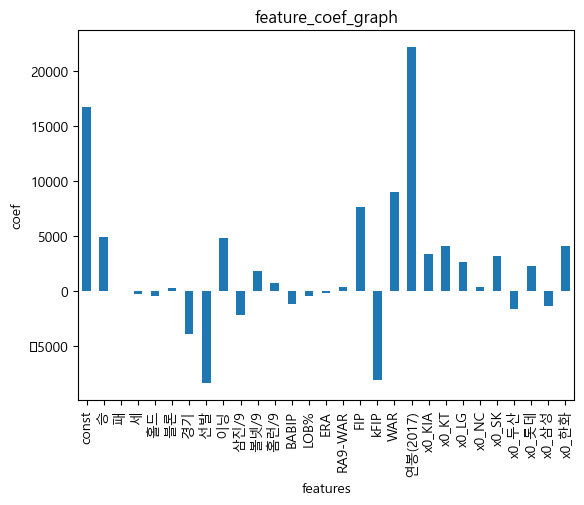

In [61]:
ax = coefs_se.plot(kind = 'bar')
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

- 영향력이 큰 피처 5가지 뽑아서 유의미한 피처인지 확인
    - 연봉(2017): O
    - kFIP : X
    - WAR : O
    - 선발 : X
    - FIP : X

In [62]:
import warnings
warnings.filterwarnings('ignore')

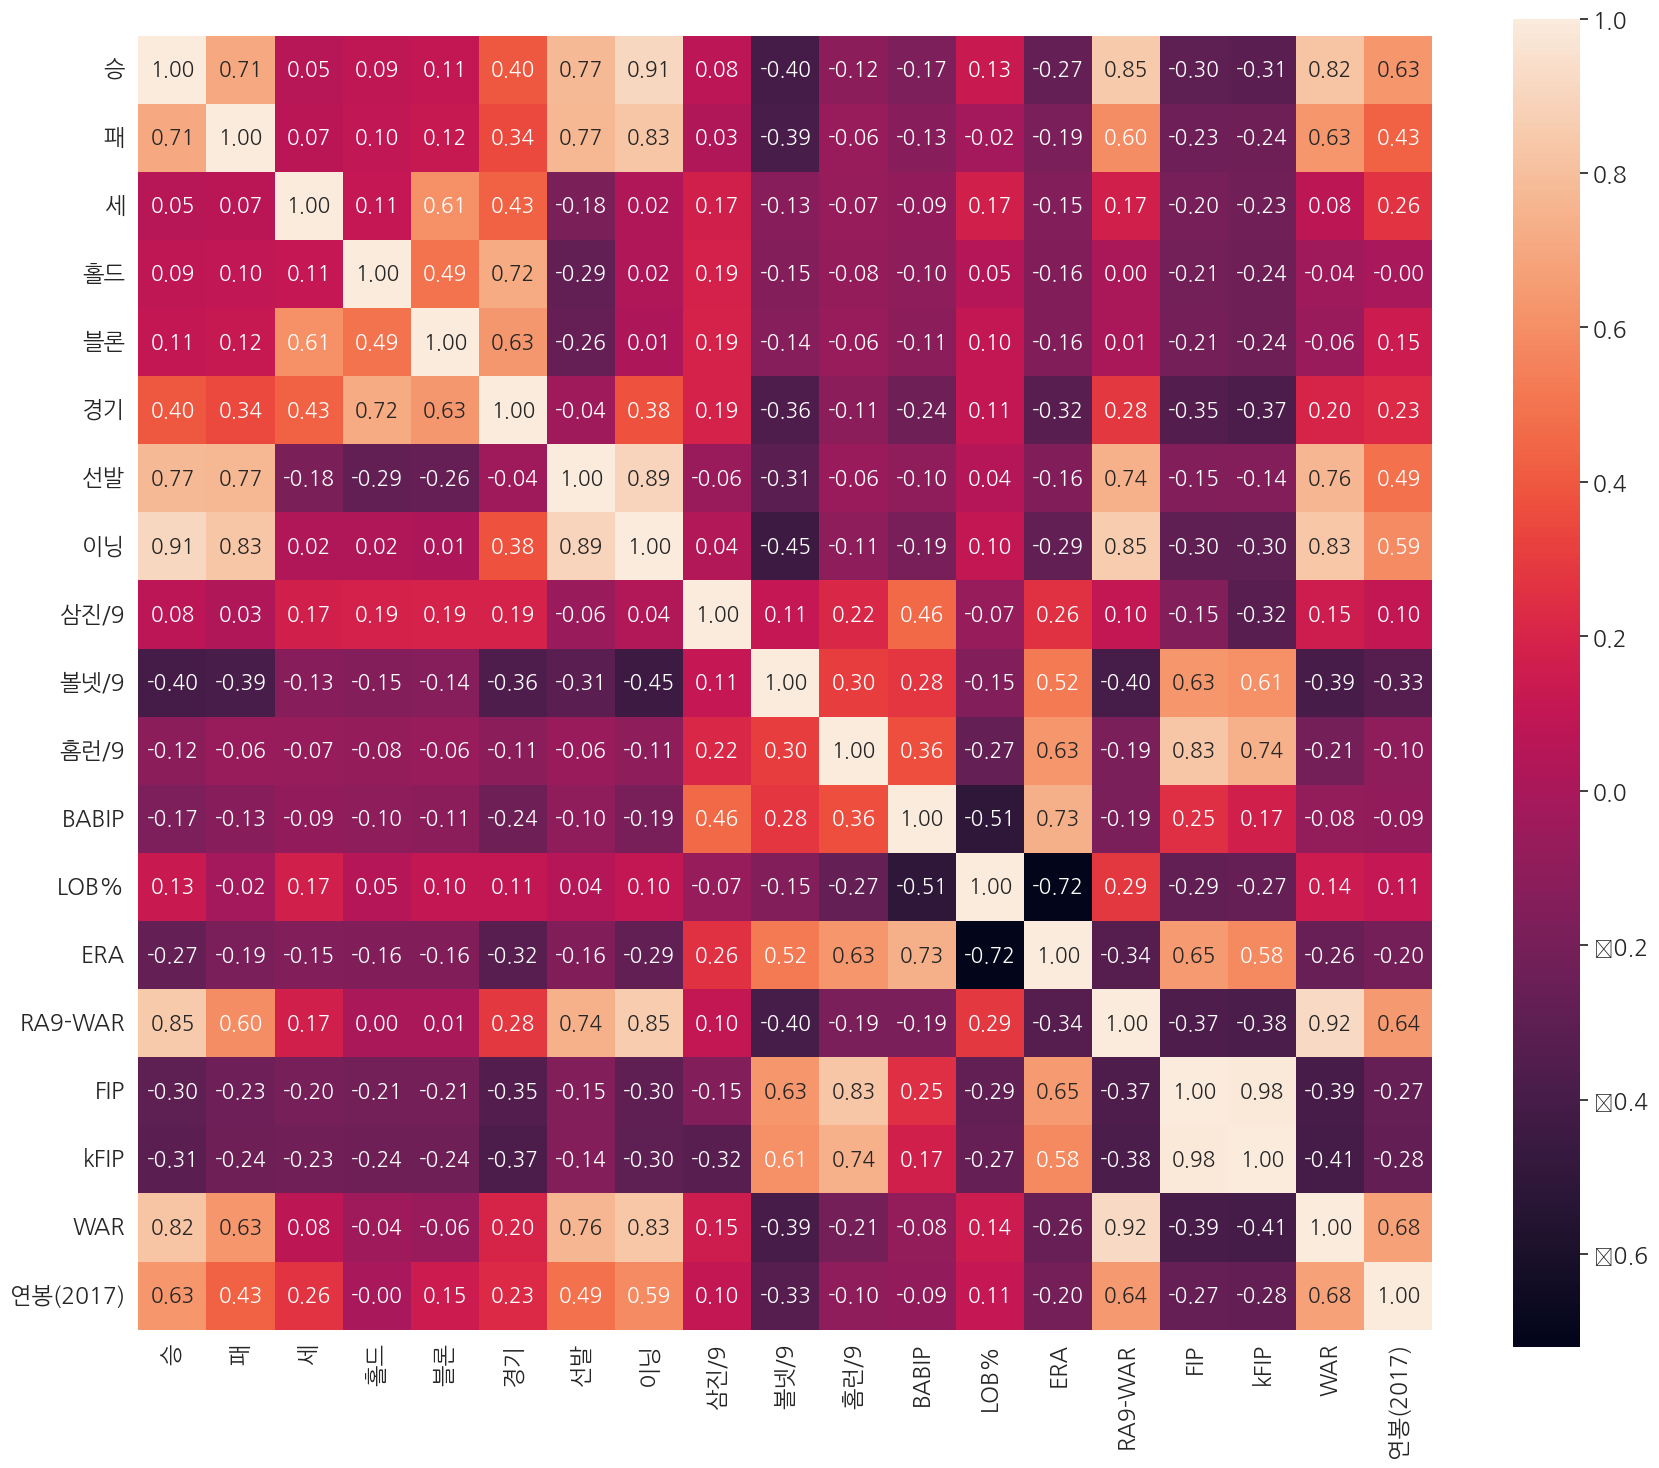

In [63]:
# 피처들의 상관관계 시각화
plt.figure(figsize=(18,15))
corr = pich[ss_columns].corr()
sns.set(font_scale=1.5, font = "NanumGothic")
hm = sns.heatmap(
    corr.values,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws= {
        "size":15
    },
    yticklabels=ss_columns,
    xticklabels=ss_columns
)

plt.tight_layout()
plt.show()

- 몇몇 피처 쌍에서 높은 연관성을 발견할 수 있음

- 회귀 분석은 피처 간의 독립성을 전제로 하는 분석이기 때문에 올바른 회귀 분석을 위해서는 연관성이 높은 피처 쌍을 제거해야함
    - 다중 공선성
        - 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
        - 모델 성능을 위해 어떤 피처를 제거하는 것이 옳은 판단일지에 대한 기준을 제시할 수 있음
        - 다중 공선성은 분산팽창요인(Variance Inflation Factor(VIF))이라는 계수로 평가
            - 일반적으로 VIF가 15를 넘으면 다중 공선성의 문제가 발생했다고 판단

VIF 계수

In [64]:
x

,const,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,1.0,1.311273,2.816290,-0.321392,-0.364433,-0.563040,-0.195968,1.863736,1.681682,0.270811,...,-0.442955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.113855,-0.626963,-0.977371,0.040703,...,-0.518952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.840104,-0.723353,-0.321392,-0.589415,-0.563040,-0.450936,-0.523184,-0.421569,-1.082364,...,-0.450955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.571182,-0.079782,-0.321392,1.885384,0.024269,0.415957,-0.626963,-0.519534,-0.780132,...,1.148972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.419817,-0.626963,-1.121319,-2.456146,...,-0.542950,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,-0.033337,0.563790,2.883701,-0.589415,1.786197,0.619932,-0.626963,-0.399577,0.109392,...,-0.290962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,1.0,-0.840104,-1.045139,-0.321392,-0.589415,-0.563040,-1.419817,-0.626963,-1.121319,0.634863,...,-0.522951,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
118,1.0,-0.571182,0.242004,-0.321392,-0.589415,-0.563040,-1.011867,0.099491,-0.501540,0.150605,...,-0.362959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,1.0,-0.840104,-1.045139,-0.321392,-0.364433,-0.563040,-1.317830,-0.626963,-1.079334,0.325762,...,-0.490953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
variance_inflation_factor(x.values, 0)

0.0

In [66]:
variance_inflation_factor(x.values, 1)

8.28397206258784

In [67]:
x.shape

(121, 29)

In [68]:
# 피처마다의 vif 계수 출력

In [69]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

,VIF_Factor,feature
0,0.0,const
1,8.3,승
2,5.9,패
3,3.0,세
4,4.5,홀드
5,2.9,블론
6,16.0,경기
7,39.1,선발
8,65.5,이닝
9,93.5,삼진/9


In [70]:
# OLS model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     37.53
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           7.28e-39
Time:                        00:37:34   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2602.
Df Residuals:                      93   BIC:                             2680.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    865.160     19.344      0.000     1.5e+04    1.85e+04
승           4872.5062   2672.351      1.823      0.071    -434.253    1.02e+04
패             16.7939   2264.751      0.007      0.994   -4480.553    4514.140
세           -259.5163   1617.477     -0.160      0.873   -3471.504    2952.472
홀드          -453.5927   1969.654     -0.230      0.818   -4364.935    3457.750
블론           257.9138   1594.644      0.162      0.872   -2908.733    3424.561
경기         -3963.4590   3710.595     -1.068      0.288   -1.13e+04    3405.047
선발         -8405.7404   5806.118     -1.448      0.151   -1.99e+04    3124.060
이닝          4761.5512   7515.711      0.634      0.528   -1.02e+04    1.97e+04
삼진/9       -2210.2765   8979.789     -0.246      0.806      -2e+04    1.56e+04
볼넷/9        1781.1699   6508.674      0.274      0.785   -1.11e+04    1.47e+04
홈런/9         673.2587   1.93e+04      0.035      0.972   -3.77e+04    3.91e+04
BABIP      -1209.2111   2117.692     -0.571      0.569   -5414.527    2996.105
LOB%        -504.2949   1887.047     -0.267      0.790   -4251.597    3243.007
ERA         -201.7471   3387.154     -0.060      0.953   -6927.964    6524.470
RA9-WAR      376.1761   3483.522      0.108      0.914   -6541.408    7293.760
FIP         7647.5420   1.11e+05      0.069      0.945   -2.13e+05    2.28e+05
kFIP       -8135.4892   9.33e+04     -0.087      0.931   -1.93e+05    1.77e+05
WAR         8951.6546   3036.579      2.948      0.004    2921.611     1.5e+04
연봉(2017)    2.214e+04   1500.205     14.757      0.000    1.92e+04    2.51e+04
x0_KIA      3315.8628   2910.194      1.139      0.257   -2463.206    9094.932
x0_KT       4050.0142   2573.038      1.574      0.119   -1059.529    9159.557
x0_LG       2638.6503   2690.205      0.981      0.329   -2703.564    7980.864
x0_NC        370.5884   3312.835      0.112      0.911   -6208.045    6949.222
x0_SK       3150.4668   2947.209      1.069      0.288   -2702.106    9003.039
x0_두산      -1705.8990   2985.201     -0.571      0.569   -7633.917    4222.119
x0_롯데       2229.6328   3654.294      0.610      0.543   -5027.072    9486.337
x0_삼성      -1370.8079   2826.062     -0.485      0.629   -6982.807    4241.191
x0_한화       4057.2758   2642.588      1.535      0.128   -1190.380    9304.931
==============================================================================
Omnibus:                       33.418   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.666
Skew:                           0.276   Prob(JB):                     5.49e-91
Kurtosis:                      12.063   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

#### 변수제거 1

- 제거된 변수 : 패
- 무의미한 변수가 다중공선성보다 더 심각한 문제를 유발하기 때문
- 최종적으로는 p값이 높은 변수, VIF가 높은 변수 모두 제거되어야 함

In [71]:
new_x = x.drop("패", axis = 1)

In [72]:
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     39.39
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.14e-39
Time:                        00:37:34   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2600.
Df Residuals:                      94   BIC:                             2675.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    857.660     19.513      0.000     1.5e+04    1.84e+04
승           4871.4101   2654.030      1.835      0.070    -398.229    1.01e+04
세           -256.2777   1549.094     -0.165      0.869   -3332.040    2819.485
홀드          -449.9599   1897.578     -0.237      0.813   -4217.646    3317.726
블론           260.2576   1554.671      0.167      0.867   -2826.578    3347.093
경기         -3962.9014   3690.048     -1.074      0.286   -1.13e+04    3363.776
선발         -8391.5909   5454.364     -1.539      0.127   -1.92e+04    2438.176
이닝          4767.8126   7428.299      0.642      0.523   -9981.250    1.95e+04
삼진/9       -2204.8092   8901.741     -0.248      0.805   -1.99e+04    1.55e+04
볼넷/9        1788.0323   6408.188      0.279      0.781   -1.09e+04    1.45e+04
홈런/9         696.2632    1.9e+04      0.037      0.971    -3.7e+04    3.84e+04
BABIP      -1211.9165   2074.903     -0.584      0.561   -5331.684    2907.851
LOB%        -504.2237   1876.959     -0.269      0.789   -4230.970    3222.523
ERA         -198.9028   3347.420     -0.059      0.953   -6845.283    6447.477
RA9-WAR      367.9152   3282.983      0.112      0.911   -6150.524    6886.355
FIP         7537.8906    1.1e+05      0.069      0.945    -2.1e+05    2.25e+05
kFIP       -8049.5494   9.21e+04     -0.087      0.931   -1.91e+05    1.75e+05
WAR         8956.2779   2956.033      3.030      0.003    3087.006    1.48e+04
연봉(2017)    2.214e+04   1458.548     15.177      0.000    1.92e+04     2.5e+04
x0_KIA      3315.8854   2894.672      1.146      0.255   -2431.554    9063.325
x0_KT       4052.8333   2531.227      1.601      0.113    -972.977    9078.643
x0_LG       2638.4706   2675.750      0.986      0.327   -2674.293    7951.234
x0_NC        367.8936   3275.280      0.112      0.911   -6135.252    6871.040
x0_SK       3149.9767   2930.754      1.075      0.285   -2669.104    8969.057
x0_두산      -1708.5868   2947.311     -0.580      0.563   -7560.542    4143.369
x0_롯데       2224.1897   3560.722      0.625      0.534   -4845.707    9294.087
x0_삼성      -1366.6176   2754.222     -0.496      0.621   -6835.191    4101.955
x0_한화       4061.2143   2574.857      1.577      0.118   -1051.224    9173.653
==============================================================================
Omnibus:                       33.412   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.248
Skew:                           0.277   Prob(JB):                     6.76e-91
Kurtosis:                      12.059   Cond. No.                     2.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-30. This might indicate

- AIC, BIC가 이전 모델보다 값이 적어졌으므로 나은 모델로 판단 가능

In [73]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,0.0,const
1,8.3,승
2,2.8,세
3,4.2,홀드
4,2.8,블론
5,16.0,경기
6,34.9,선발
7,64.7,이닝
8,92.9,삼진/9
9,48.1,볼넷/9


#### 변수제거 2

- 제거된 변수 : 패, 홈런/9

In [74]:
new_x.columns

Index(['const', '승', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데', 'x0_삼성',
       'x0_한화'],
      dtype='object')

In [75]:
new_x = new_x.drop("홈런/9", axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     41.40
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.76e-40
Time:                        00:37:34   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2598.
Df Residuals:                      95   BIC:                             2670.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    853.138     19.616      0.000     1.5e+04    1.84e+04
승           4872.5084   2639.875      1.846      0.068    -368.307    1.01e+04
세           -252.9244   1538.242     -0.164      0.870   -3306.720    2800.871
홀드          -442.5461   1876.828     -0.236      0.814   -4168.520    3283.428
블론           261.0336   1546.335      0.169      0.866   -2808.829    3330.896
경기         -3961.1507   3670.294     -1.079      0.283   -1.12e+04    3325.305
선발         -8393.1360   5425.457     -1.547      0.125   -1.92e+04    2377.758
이닝          4765.4925   7388.884      0.645      0.521   -9903.297    1.94e+04
삼진/9       -2460.8987   5488.329     -0.448      0.655   -1.34e+04    8434.812
볼넷/9        1561.6781   1705.651      0.916      0.362   -1824.467    4947.823
BABIP      -1197.9690   2028.973     -0.590      0.556   -5225.990    2830.052
LOB%        -501.8934   1865.997     -0.269      0.789   -4206.365    3202.578
ERA         -211.4196   3312.412     -0.064      0.949   -6787.390    6364.550
RA9-WAR      364.2128   3264.136      0.112      0.911   -6115.916    6844.342
FIP         1.141e+04   2.87e+04      0.397      0.692   -4.57e+04    6.85e+04
kFIP       -1.124e+04   3.01e+04     -0.373      0.710    -7.1e+04    4.86e+04
WAR         8957.6782   2940.209      3.047      0.003    3120.625    1.48e+04
연봉(2017)    2.214e+04   1448.906     15.280      0.000    1.93e+04     2.5e+04
x0_KIA      3303.6986   2860.366      1.155      0.251   -2374.846    8982.243
x0_KT       4050.8332   2517.302      1.609      0.111    -946.644    9048.310
x0_LG       2649.6132   2644.420      1.002      0.319   -2600.225    7899.451
x0_NC        367.8722   3258.020      0.113      0.910   -6100.115    6835.859
x0_SK       3180.1955   2797.620      1.137      0.259   -2373.782    8734.173
x0_두산      -1724.6754   2899.094     -0.595      0.553   -7480.105    4030.754
x0_롯데       2223.1754   3541.850      0.628      0.532   -4808.286    9254.637
x0_삼성      -1371.7852   2736.117     -0.501      0.617   -6803.664    4060.094
x0_한화       4056.4073   2557.964      1.586      0.116   -1021.793    9134.608
==============================================================================
Omnibus:                       33.382   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.922
Skew:                           0.273   Prob(JB):                     4.83e-91
Kurtosis:                      12.066   Cond. No.                     2.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.48e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [76]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,0.0,const
1,8.3,승
2,2.8,세
3,4.2,홀드
4,2.8,블론
5,16.0,경기
6,34.9,선발
7,64.7,이닝
8,35.7,삼진/9
9,3.4,볼넷/9


#### 변수제거 3

- 제거된 변수 : 패, 홈런/9, ERA

In [77]:
new_x = new_x.drop("ERA", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     43.58
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.63e-41
Time:                        00:37:34   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2596.
Df Residuals:                      96   BIC:                             2665.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+04    848.381     19.724      0.000     1.5e+04    1.84e+04
승           4872.7865   2626.143      1.855      0.067    -340.066    1.01e+04
세           -263.2645   1521.732     -0.173      0.863   -3283.878    2757.349
홀드          -460.0463   1847.036     -0.249      0.804   -4126.384    3206.291
블론           263.5238   1537.803      0.171      0.864   -2788.991    3316.038
경기         -3919.8015   3593.879     -1.091      0.278   -1.11e+04    3213.992
선발         -8369.2185   5384.352     -1.554      0.123   -1.91e+04    2318.637
이닝          4745.2681   7343.695      0.646      0.520   -9831.852    1.93e+04
삼진/9       -2464.7705   5459.453     -0.451      0.653   -1.33e+04    8372.158
볼넷/9        1531.7202   1631.272      0.939      0.350   -1706.328    4769.769
BABIP      -1279.0926   1573.321     -0.813      0.418   -4402.110    1843.925
LOB%        -421.6772   1372.113     -0.307      0.759   -3145.301    2301.947
RA9-WAR      341.3050   3227.471      0.106      0.916   -6065.175    6747.785
FIP         1.127e+04   2.85e+04      0.395      0.693   -4.53e+04    6.79e+04
kFIP       -1.117e+04   2.99e+04     -0.373      0.710   -7.06e+04    4.83e+04
WAR         8971.2560   2917.252      3.075      0.003    3180.556    1.48e+04
연봉(2017)    2.214e+04   1440.684     15.365      0.000    1.93e+04     2.5e+04
x0_KIA      3319.1390   2835.296      1.171      0.245   -2308.879    8947.157
x0_KT       4045.7996   2502.981      1.616      0.109    -922.579    9014.178
x0_LG       2665.5177   2618.962      1.018      0.311   -2533.082    7864.117
x0_NC        374.4088   3239.474      0.116      0.908   -6055.897    6804.714
x0_SK       3181.7275   2782.968      1.143      0.256   -2342.420    8705.875
x0_두산      -1767.9108   2804.186     -0.630      0.530   -7334.176    3798.354
x0_롯데       2198.5287   3502.427      0.628      0.532   -4753.734    9150.791
x0_삼성      -1350.2377   2701.089     -0.500      0.618   -6711.858    4011.382
x0_한화       4066.8679   2539.432      1.601      0.113    -973.866    9107.601
==============================================================================
Omnibus:                       33.384   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.430
Skew:                           0.272   Prob(JB):                     3.75e-91
Kurtosis:                      12.072   Cond. No.                     2.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,0.0,const
1,8.3,승
2,2.8,세
3,4.1,홀드
4,2.8,블론
5,15.5,경기
6,34.7,선발
7,64.6,이닝
8,35.7,삼진/9
9,3.2,볼넷/9



#### 변수제거 4

- 제거된 변수 : 패, 홈런/9, ERA, RA9-WAR

In [79]:
new_x = new_x.drop("RA9-WAR", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     45.94
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.84e-42
Time:                        00:37:34   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2594.
Df Residuals:                      97   BIC:                             2661.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    843.801     19.834      0.000    1.51e+04    1.84e+04
승           4917.4220   2578.756      1.907      0.059    -200.694       1e+04
세           -210.4410   1430.067     -0.147      0.883   -3048.727    2627.845
홀드          -432.1730   1818.791     -0.238      0.813   -4041.969    3177.623
블론           231.6273   1500.227      0.154      0.878   -2745.909    3209.163
경기         -3993.5076   3507.630     -1.139      0.258    -1.1e+04    2968.166
선발         -8489.3387   5236.280     -1.621      0.108   -1.89e+04    1903.227
이닝          4974.8108   6979.724      0.713      0.478   -8878.009    1.88e+04
삼진/9       -2436.8370   5425.194     -0.449      0.654   -1.32e+04    8330.670
볼넷/9        1532.9087   1622.897      0.945      0.347   -1688.093    4753.910
BABIP      -1267.6452   1561.572     -0.812      0.419   -4366.933    1831.643
LOB%        -367.1095   1264.893     -0.290      0.772   -2877.572    2143.353
FIP         1.111e+04   2.83e+04      0.392      0.696   -4.51e+04    6.73e+04
kFIP       -1.099e+04   2.97e+04     -0.369      0.713      -7e+04     4.8e+04
WAR         9161.5103   2284.701      4.010      0.000    4627.012    1.37e+04
연봉(2017)    2.213e+04   1430.191     15.471      0.000    1.93e+04     2.5e+04
x0_KIA      3343.3800   2811.573      1.189      0.237   -2236.814    8923.574
x0_KT       4025.1105   2482.573      1.621      0.108    -902.109    8952.330
x0_LG       2652.7133   2602.793      1.019      0.311   -2513.111    7818.538
x0_NC        348.4176   3213.631      0.108      0.914   -6029.750    6726.586
x0_SK       3224.5904   2739.224      1.177      0.242   -2212.010    8661.191
x0_두산      -1757.9882   2788.294     -0.630      0.530   -7291.980    3776.004
x0_롯데       2225.5626   3475.235      0.640      0.523   -4671.817    9122.942
x0_삼성      -1373.0699   2678.688     -0.513      0.609   -6689.524    3943.384
x0_한화       4047.2851   2519.730      1.606      0.111    -953.681    9048.251
==============================================================================
Omnibus:                       33.139   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.539
Skew:                           0.262   Prob(JB):                     7.12e-90
Kurtosis:                      12.009   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,0.0,const
1,8.0,승
2,2.5,세
3,4.0,홀드
4,2.7,블론
5,14.9,경기
6,33.2,선발
7,58.9,이닝
8,35.6,삼진/9
9,3.2,볼넷/9


#### 변수제거 5

- 제거된 변수 : 패, 홈런/9, ERA, RA9-WAR, x0_NC

In [81]:
new_x = new_x.drop("x0_NC", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     45.94
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.84e-42
Time:                        00:37:35   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2594.
Df Residuals:                      97   BIC:                             2661.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.708e+04   3419.107      4.997      0.000    1.03e+04    2.39e+04
승           4917.4220   2578.756      1.907      0.059    -200.694       1e+04
세           -210.4410   1430.067     -0.147      0.883   -3048.727    2627.845
홀드          -432.1730   1818.791     -0.238      0.813   -4041.969    3177.623
블론           231.6273   1500.227      0.154      0.878   -2745.909    3209.163
경기         -3993.5076   3507.630     -1.139      0.258    -1.1e+04    2968.166
선발         -8489.3387   5236.280     -1.621      0.108   -1.89e+04    1903.227
이닝          4974.8108   6979.724      0.713      0.478   -8878.009    1.88e+04
삼진/9       -2436.8370   5425.194     -0.449      0.654   -1.32e+04    8330.670
볼넷/9        1532.9087   1622.897      0.945      0.347   -1688.093    4753.910
BABIP      -1267.6452   1561.572     -0.812      0.419   -4366.933    1831.643
LOB%        -367.1095   1264.893     -0.290      0.772   -2877.572    2143.353
FIP         1.111e+04   2.83e+04      0.392      0.696   -4.51e+04    6.73e+04
kFIP       -1.099e+04   2.97e+04     -0.369      0.713      -7e+04     4.8e+04
WAR         9161.5103   2284.701      4.010      0.000    4627.012    1.37e+04
연봉(2017)    2.213e+04   1430.191     15.471      0.000    1.93e+04     2.5e+04
x0_KIA      2994.9624   4598.653      0.651      0.516   -6132.091    1.21e+04
x0_KT       3676.6929   4238.017      0.868      0.388   -4734.598    1.21e+04
x0_LG       2304.2957   4471.766      0.515      0.608   -6570.923    1.12e+04
x0_SK       2876.1727   4523.152      0.636      0.526   -6101.032    1.19e+04
x0_두산      -2106.4058   4554.553     -0.462      0.645   -1.11e+04    6933.121
x0_롯데       1877.1450   5120.408      0.367      0.715   -8285.448     1.2e+04
x0_삼성      -1721.4876   4296.468     -0.401      0.690   -1.02e+04    6805.812
x0_한화       3698.8675   4399.937      0.841      0.403   -5033.789    1.24e+04
==============================================================================
Omnibus:                       33.139   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.539
Skew:                           0.262   Prob(JB):                     7.12e-90
Kurtosis:                      12.009   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,14.1,const
1,8.0,승
2,2.5,세
3,4.0,홀드
4,2.7,블론
5,14.9,경기
6,33.2,선발
7,58.9,이닝
8,35.6,삼진/9
9,3.2,볼넷/9


#### 변수제거 6

- 제거된 변수 : 패, 홈런/9, ERA, RA9-WAR, x0_NC, 세

In [83]:
new_x = new_x.drop("세", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     48.51
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           5.49e-43
Time:                        00:37:35   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2592.
Df Residuals:                      98   BIC:                             2656.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.711e+04   3398.498      5.034      0.000    1.04e+04    2.39e+04
승           4952.6380   2554.779      1.939      0.055    -117.237       1e+04
홀드          -314.2708   1624.636     -0.193      0.847   -3538.308    2909.767
블론           153.9611   1397.296      0.110      0.912   -2618.927    2926.850
경기         -4209.9826   3168.311     -1.329      0.187   -1.05e+04    2077.427
선발         -8601.3407   5154.744     -1.669      0.098   -1.88e+04    1628.081
이닝          5220.6758   6742.887      0.774      0.441   -8160.364    1.86e+04
삼진/9       -2459.9839   5395.776     -0.456      0.649   -1.32e+04    8247.758
볼넷/9        1530.9038   1614.719      0.948      0.345   -1673.454    4735.261
BABIP      -1280.3765   1551.371     -0.825      0.411   -4359.022    1798.269
LOB%        -391.6391   1247.587     -0.314      0.754   -2867.435    2084.157
FIP         1.124e+04   2.82e+04      0.399      0.691   -4.47e+04    6.71e+04
kFIP       -1.114e+04   2.96e+04     -0.377      0.707   -6.98e+04    4.76e+04
WAR         9070.1690   2187.762      4.146      0.000    4728.626    1.34e+04
연봉(2017)    2.207e+04   1377.224     16.027      0.000    1.93e+04    2.48e+04
x0_KIA      2969.7389   4572.462      0.649      0.518   -6104.162     1.2e+04
x0_KT       3646.1426   4211.747      0.866      0.389   -4711.933     1.2e+04
x0_LG       2285.1515   4447.506      0.514      0.609   -6540.780    1.11e+04
x0_SK       2830.8300   4490.063      0.630      0.530   -6079.553    1.17e+04
x0_두산      -2117.1568   4531.178     -0.467      0.641   -1.11e+04    6874.819
x0_롯데       1772.2180   5045.145      0.351      0.726   -8239.708    1.18e+04
x0_삼성      -1722.1527   4274.966     -0.403      0.688   -1.02e+04    6761.378
x0_한화       3696.0588   4377.878      0.844      0.401   -4991.697    1.24e+04
==============================================================================
Omnibus:                       33.532   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.354
Skew:                           0.298   Prob(JB):                     1.29e-89
Kurtosis:                      11.991   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,14.1,const
1,8.0,승
2,3.2,홀드
3,2.4,블론
4,12.3,경기
5,32.5,선발
6,55.6,이닝
7,35.6,삼진/9
8,3.2,볼넷/9
9,2.9,BABIP


#### 변수제거 7

- 제거된 변수 : 패, 홈런/9, ERA, RA9-WAR, x0_NC, 세, 블론

In [85]:
new_x = new_x.drop("블론", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     51.33
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           7.59e-44
Time:                        00:37:35   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2590.
Df Residuals:                      99   BIC:                             2651.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e+04   3332.158      5.115      0.000    1.04e+04    2.37e+04
승           4982.3614   2527.790      1.971      0.052     -33.323    9998.046
홀드          -306.1549   1614.848     -0.190      0.850   -3510.364    2898.054
경기         -4114.6804   3032.720     -1.357      0.178   -1.01e+04    1902.894
선발         -8603.4412   5128.926     -1.677      0.097   -1.88e+04    1573.461
이닝          5165.4889   6690.627      0.772      0.442   -8110.166    1.84e+04
삼진/9       -2438.8073   5365.381     -0.455      0.650   -1.31e+04    8207.273
볼넷/9        1536.5705   1605.828      0.957      0.341   -1649.740    4722.881
BABIP      -1278.5937   1543.528     -0.828      0.409   -4341.288    1784.100
LOB%        -384.8394   1239.827     -0.310      0.757   -2844.926    2075.247
FIP         1.117e+04    2.8e+04      0.399      0.691   -4.44e+04    6.68e+04
kFIP       -1.107e+04   2.94e+04     -0.376      0.708   -6.95e+04    4.73e+04
WAR         9040.0276   2159.736      4.186      0.000    4754.642    1.33e+04
연봉(2017)     2.21e+04   1341.674     16.475      0.000    1.94e+04    2.48e+04
x0_KIA      3046.0149   4497.149      0.677      0.500   -5877.305     1.2e+04
x0_KT       3719.2450   4138.361      0.899      0.371   -4492.162    1.19e+04
x0_LG       2345.7315   4391.317      0.534      0.594   -6367.595    1.11e+04
x0_SK       2939.1291   4359.251      0.674      0.502   -5710.571    1.16e+04
x0_두산      -2068.7165   4487.245     -0.461      0.646    -1.1e+04    6834.950
x0_롯데       1911.5546   4859.663      0.393      0.695   -7731.071    1.16e+04
x0_삼성      -1714.4515   4253.015     -0.403      0.688   -1.02e+04    6724.453
x0_한화       3772.6044   4300.788      0.877      0.383   -4761.092    1.23e+04
==============================================================================
Omnibus:                       33.381   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.005
Skew:                           0.292   Prob(JB):                     6.87e-89
Kurtosis:                      11.955   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,13.7,const
1,7.9,승
2,3.2,홀드
3,11.4,경기
4,32.5,선발
5,55.2,이닝
6,35.5,삼진/9
7,3.2,볼넷/9
8,2.9,BABIP
9,1.9,LOB%


#### 변수제거 8

- 제거된 변수 : 패, 홈런/9, ERA, RA9-WAR, x0_NC, 세, 블론, 홀드

In [87]:
new_x = new_x.drop("홀드", axis=1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop=True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     54.42
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.03e-44
Time:                        00:37:35   Log-Likelihood:                -1272.8
No. Observations:                 121   AIC:                             2588.
Df Residuals:                     100   BIC:                             2646.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.712e+04   3290.167      5.204      0.000    1.06e+04    2.36e+04
승           4838.8917   2400.204      2.016      0.046      76.956    9600.828
경기         -4392.1027   2643.508     -1.661      0.100   -9636.747     852.542
선발         -8638.9918   5100.731     -1.694      0.093   -1.88e+04    1480.714
이닝          5409.8816   6533.547      0.828      0.410   -7552.489    1.84e+04
삼진/9       -2428.1471   5339.163     -0.455      0.650    -1.3e+04    8164.600
볼넷/9        1544.0463   1597.587      0.966      0.336   -1625.520    4713.612
BABIP      -1283.9256   1535.815     -0.836      0.405   -4330.938    1763.087
LOB%        -392.7510   1233.138     -0.318      0.751   -2839.261    2053.759
FIP         1.106e+04   2.79e+04      0.397      0.692   -4.42e+04    6.64e+04
kFIP       -1.099e+04   2.93e+04     -0.375      0.708   -6.91e+04    4.71e+04
WAR         9016.4601   2145.737      4.202      0.000    4759.378    1.33e+04
연봉(2017)    2.216e+04   1300.970     17.034      0.000    1.96e+04    2.47e+04
x0_KIA      2979.3959   4461.736      0.668      0.506   -5872.562    1.18e+04
x0_KT       3698.2007   4116.883      0.898      0.371   -4469.579    1.19e+04
x0_LG       2178.7049   4281.248      0.509      0.612   -6315.169    1.07e+04
x0_SK       2841.6871   4307.929      0.660      0.511   -5705.122    1.14e+04
x0_두산      -2139.3410   4450.148     -0.481      0.632    -1.1e+04    6689.626
x0_롯데       1823.8692   4814.229      0.379      0.706   -7727.424    1.14e+04
x0_삼성      -1796.1876   4210.663     -0.427      0.671   -1.02e+04    6557.647
x0_한화       3673.0966   4248.015      0.865      0.389   -4754.844    1.21e+04
==============================================================================
Omnibus:                       33.406   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.518
Skew:                           0.284   Prob(JB):                     4.36e-90
Kurtosis:                      12.017   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,13.5,const
1,7.2,승
2,8.7,경기
3,32.4,선발
4,53.2,이닝
5,35.5,삼진/9
6,3.2,볼넷/9
7,2.9,BABIP
8,1.9,LOB%
9,968.6,FIP


# 분석 결과

- OLS로 p-value 값이 가장 높은 피처를 하나씩 제거
    - 총 8번 제거
    - 남은 피처 중 p-value 값이 0.1 이하인 피처 선별

In [89]:
fin_train = scaled_train[["승", "경기", "선발", "WAR", "연봉(2017)"]]
fin_test = scaled_test[["승", "경기", "선발", "WAR", "연봉(2017)"]]

In [90]:
fin_lr = LinearRegression()
fin_lr.fit(fin_train, y_train)

LinearRegression()

In [91]:
fin_lr.score(fin_test, y_test)

0.9623564129139206

In [92]:
fin_pred = fin_lr.predict(fin_test)
fin_mae = mean_absolute_error(y_test, fin_pred)
fin_mae

3788.1475136863723

# 최종 시각화

## 전체 데이터에 대해서 예측

In [93]:
result_df = pich[ss_columns]

In [94]:
result_df = pich_ss.transform(result_df)

In [99]:
result_df = pd.DataFrame(result_df, columns=ss_columns)

In [101]:
result_df = result_df[["승", "경기", "선발", "WAR", "연봉(2017)"]]

In [102]:
result_df.head()

,승,경기,선발,WAR,연봉(2017)
0,3.462650,0.059001,2.486411,4.628494,2.748900
1,2.118039,0.059001,2.382632,4.210842,1.348963
2,4.538338,0.109995,2.590191,3.870533,5.348781
3,1.849117,-0.042986,2.278853,3.089370,3.348872
4,2.655883,0.059001,2.486411,2.896013,2.748900


In [103]:
vis_pred = fin_lr.predict(result_df)

In [104]:
vis_pred

array([ 1.27326874e+05,  8.59288520e+04,  1.84184706e+05,  1.20532948e+05,
        1.08612462e+05,  5.61586736e+04,  2.99632880e+04,  1.20520686e+05,
        3.10672649e+04,  8.52089057e+04,  9.50438864e+04,  6.52341152e+04,
        2.33276109e+04,  2.92230734e+04,  2.64050349e+04,  5.45900885e+04,
        4.50752876e+04,  7.46737479e+04,  1.54082378e+04,  6.96865738e+04,
        1.21995717e+05,  2.35738800e+04,  2.07257937e+04,  5.85297050e+04,
        2.31229672e+04,  1.22523175e+04,  3.23762466e+04,  2.30250234e+04,
        2.24193708e+04,  1.62047164e+04,  1.67586880e+04,  9.60535049e+03,
        1.05871742e+04,  2.43178313e+04,  9.81663906e+03,  1.07669677e+04,
        5.72864956e+04,  2.35875032e+04,  1.50573941e+04,  2.54606456e+04,
        1.67750434e+04,  1.20562786e+04,  1.11507215e+04,  2.68462688e+04,
        5.82380533e+04,  3.18592424e+03,  6.69731155e+03,  6.21714818e+03,
        3.77866149e+04,  6.94393249e+04,  5.12261178e+03,  4.59916023e+04,
        1.45470975e+04,  

In [105]:
vis_df = pd.read_csv("./picher_stats_2017.csv")

In [106]:
vis_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [107]:
vis_df = pd.concat([vis_df, pd.DataFrame(vis_pred, columns=["예측연봉"])], axis=1)

In [108]:
vis_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,127326.874398
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,85928.852018
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,184184.705582
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,120532.948445
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,108612.461645


In [109]:
# 재계약하여 연봉이 변화한 선수만 대상으로 시각화
# 재계약을 하지 않는다면 연봉에 변화가 없어 예측이 의미가 없기 때문
vis_df = vis_df[vis_df["연봉(2018)"] != vis_df["연봉(2017)"]]
vis_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,127326.874398
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,85928.852018
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,184184.705582
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,108612.461645
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,56158.673582


In [110]:
vis_df.shape

(128, 23)

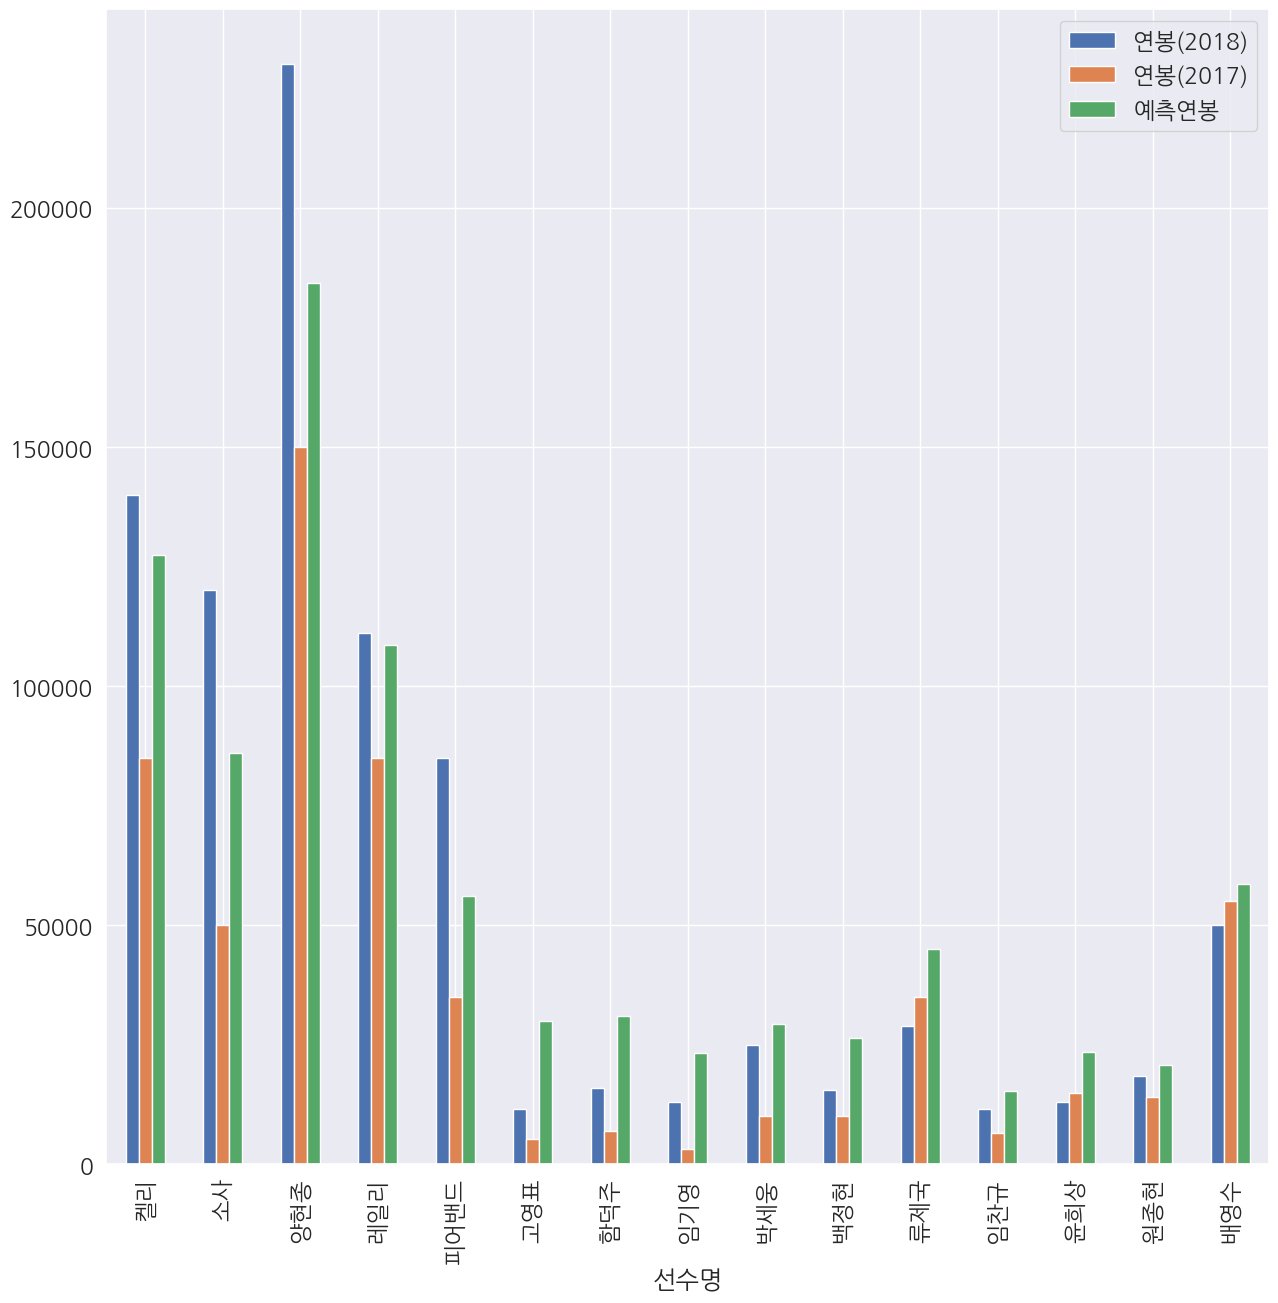

In [115]:
# 연봉 예측 시각화
vis_df.head(15).plot(x = "선수명", y = ["연봉(2018)", "연봉(2017)", "예측연봉"], kind = "bar", figsize = (15, 15))
plt.show()